In [1]:
# Examine SBGC results
#from netCDF4 import Dataset as NetCDFFile
import math
import numpy as np
import pandas as pd
import isamcalc_lib as isam
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy.ma as ma
from scipy.interpolate import griddata
import copy
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
# Read in all the obs from SRDB dataset
# =====================================================================
#  Plot the simulated SOC profiles for Umakant's samples
#  Compare with the observation also
# =====================================================================
fobs = "/global/cscratch1/sd/sshu3/SBGC/site/npp_eval/srdb-data-V4_extracted_npp_rh.csv"

# Read in obs
obs = pd.read_csv(fobs, sep=',', header=0)
rc_number = obs.shape[0]

# # print the latid and lonid of each sample for ISAM simulation usage
# for i in np.arange(0,rc_number):
#     loc = isam.latlon_2_idx(obs.Latitude[i],obs.Longitude[i])

# Merge NPP from the study
sid = obs.Study_number[0]
npp_box = [obs.NPP[0]]
npp_merged = []
npp_stdmerged = []
rh_box = [obs.Rh_annual[0]]
rh_merged = []
rh_stdmerged = []
for index, row in obs.iterrows():
    if(index>0):
        if(row['Study_number'] == sid):
            npp_box = npp_box + [row['NPP']]
            rh_box = rh_box + [row['Rh_annual']]
        else:
            temp = np.asarray(npp_box)
            npp_sid = np.nanmean(temp)
            npp_std = np.nanstd(temp)
            npp_box = [row['NPP']]
            temp = np.asarray(rh_box)
            rh_sid = np.nanmean(temp)
            rh_std = np.nanstd(temp)
            rh_box = [row['Rh_annual']]
            print(sid)
            print(npp_sid)
            print(rh_sid)
            sid = row['Study_number']
            npp_merged = npp_merged + [npp_sid]
            npp_stdmerged = npp_stdmerged + [npp_std]
            rh_merged = rh_merged + [rh_sid]
            rh_stdmerged = rh_stdmerged + [rh_std]
        if(index == (rc_number-1)):
            temp = np.asarray(npp_box)
            npp_sid = np.nanmean(temp)
            npp_std = np.nanstd(temp)
            temp = np.asarray(rh_box)
            rh_sid = np.nanmean(temp)
            rh_std = np.nanstd(temp)
            print(sid)
            print(npp_sid)
            print(rh_sid)
            npp_merged = npp_merged + [npp_sid]
            npp_stdmerged = npp_stdmerged + [npp_std]
            rh_merged = rh_merged + [rh_sid]
            rh_stdmerged = rh_stdmerged + [rh_std]
npp_sites = np.asarray(npp_merged)
npp_sites_std = np.asarray(npp_stdmerged)
rh_sites = np.asarray(rh_merged)
rh_sites_std = np.asarray(rh_stdmerged)

allid = obs.Study_number.unique()

2534
290.25
341.25
2182
290.25
nan
231
91.0
22.0
2396
268.75
352.5
4181
140.0
449.0
177
91.0
13.0
4184
35.0
nan
1232
335.6666666666667
383.3333333333333
1382
407.0
362.0
2427
390.6666666666667
nan
2630
170.0
170.0
1202
399.5
nan
1216
399.5
nan
4604
276.76363636
nan
4166
551.25
321.5
5063
92.5
nan
5305
225.0
nan
6458
579.0
nan
4212
nan
nan
7198
nan
nan
5391
nan
nan


/global/common/cori_cle7/software/python/2.7-anaconda-2019.07/lib/python2.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/common/software/python/2.7-anaconda-2019.07/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/global/common/cori_cle7/software/python/2.7-anaconda-2019.07/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice
/global/common/cori_cle7/software/python/2.7-anaconda-2019.07/lib/python2.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: Mean of empty slice
/global/common/cori_cle7/software/python/2.7-anaconda-2019.07/lib/python2.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: Mean of empty slice


In [118]:
allid

array([2534, 2182,  231, 2396, 4181,  177, 4184, 1232, 1382, 2427, 2630,
       1202, 1216, 4604, 4166, 5063, 5305, 6458, 4212, 7198, 5391])

In [119]:
rh_sites

array([341.25      ,          nan,  22.        , 352.5       ,
       449.        ,  13.        ,          nan, 383.33333333,
       362.        ,          nan, 170.        ,          nan,
                nan,          nan, 321.5       ,          nan,
                nan,          nan,          nan,          nan,
                nan])

In [121]:
npp_sites

array([290.25      , 290.25      ,  91.        , 268.75      ,
       140.        ,  91.        ,  35.        , 335.66666667,
       407.        , 390.66666667, 170.        , 399.5       ,
       399.5       , 276.76363636, 551.25      ,  92.5       ,
       225.        , 579.        ,          nan,          nan,
                nan])

In [120]:
rh_sites_std

array([ 37.66546827,          nan,   0.        ,  87.5       ,
         0.        ,   0.        ,          nan, 165.12688724,
         0.        ,          nan,   0.        ,          nan,
                nan,          nan,  35.11765938,          nan,
                nan,          nan,          nan,          nan,
                nan])

In [122]:
npp_sites_std

array([ 58.10496967,  58.10496967,   0.        , 130.75      ,
         0.        ,   0.        ,  29.43920289,  75.58255237,
         0.        , 127.44759272,   0.        ,   0.        ,
         0.        , 122.85755511,  50.05684269,  13.4       ,
         0.        ,  59.61543424,          nan,          nan,
                nan])

In [133]:
# Dictionary of the site for evaluation
site =  {
    "boreal_2396" : 0,
    "boreal_2534" : 1,
    "boreal_4166" : 2,
    "boreal_4604" : 3,
    "boreal_5305" : 4,
    "boreal_decid_1382" : 5,
}

obs_year = [1998, 2001, 2002, 2005, 2007, 1994]
studyid = [2396, 2534, 4166, 4604, 5305, 1382]

idbox = []
npp_box = []
npp_obs_box = []
npp_obsstd_box = []
rh_box = []
rh_obs_box = []
rh_obsstd_box = []
# Read in the simulated site level NPP
for siteid, ind in site.items():
    print(siteid)
    path='/global/cscratch1/sd/sshu3/SBGC/site/npp_eval/'
    fname='/site_daily_2_pft.txt'
    obs_fname=path+siteid+fname
    data = pd.read_csv(obs_fname,delim_whitespace=True,header=None)
    npp_prim = data.values[:,3]

    # Get the specific year for model-data comparison
    pos = obs_year[ind] - 1861
    npp_ext = np.sum(npp_prim[(pos*365):(pos*365+365)])
    npp_box = npp_box + [npp_ext]
    # Get the corresponding observation
    for i in np.arange(0,len(npp_sites)):
        if (allid[i] == studyid[ind]):
            idbox = idbox + [studyid[ind]]
            npp_obs_box = npp_obs_box + [npp_sites[i]]
            npp_obsstd_box = npp_obsstd_box + [npp_sites_std[i]]
            
    # Read in the model rh
    fname='/resp.txt'
    obs_fname=path+siteid+fname
    data = pd.read_csv(obs_fname,delim_whitespace=True,header=None)
    rh_prim = data.values

    rh_daily = np.zeros(((365*155),10))
    for i in np.arange(0,np.shape(rh_prim)[0]):
        yr = i // 52
        if(i % 52 == 0):
            rh_daily[(i*7+yr):(i*7+yr+8),:] = 1000.*rh_prim[i,:]/8.
        else:
            rh_daily[(i*7+yr):(i*7+yr+7),:] = 1000.*rh_prim[i,:]/7.

    rh1m = np.zeros((np.shape(rh_daily)[0]))
    # Calcualte the 1-m mean Respiration
    for i in np.arange(0,np.shape(rh_daily)[0]):
        rh1m[i] = isam.agg_1m_soil(rh_daily[i,0:8])
    
    # Get the specific year for model-data comparison
    rh_ext = np.sum(rh1m[(pos*365):(pos*365+365)])
    rh_box = rh_box + [rh_ext]
    # Get the corresponding observation
    for i in np.arange(0,len(rh_sites)):
        if (allid[i] == studyid[ind]):
            rh_obs_box = rh_obs_box + [rh_sites[i]]
            rh_obsstd_box = rh_obsstd_box + [rh_sites_std[i]]
            
npp_id = np.asarray(idbox, dtype=np.intc)
npp_mod = np.asarray(npp_box)
npp_obs = np.asarray(npp_obs_box)
npp_obsstd = np.asarray(npp_obsstd_box)

rh_id = np.asarray(idbox, dtype=np.intc)
rh_mod = np.asarray(rh_box)
rh_obs = np.asarray(rh_obs_box)
rh_obsstd = np.asarray(rh_obsstd_box)

# modx = np.arange(0,365)
# mody = rh1m[(140*365):(140*365+365)]
# obs_2534 = obsy
# mod_2534 = mody[obsx]
# plt.xlim([120, 300])
# plt.scatter(obsx, obsy)
# plt.plot(modx, mody)

boreal_4166
boreal_2396
boreal_2534
boreal_4604
boreal_5305
boreal_decid_1382


In [ ]:
## Run1

In [124]:
npp_mod

array([341.356842, 314.717837, 314.653473, 331.947066, 183.25834 ,
       409.907217])

In [136]:
npp_obs

array([551.25      , 268.75      , 290.25      , 276.76363636,
       225.        , 407.        ])

In [139]:
npp_obsstd

array([ 50.05684269, 130.75      ,  58.10496967, 122.85755511,
         0.        ,   0.        ])

In [125]:
rh_mod

array([272.887625, 315.6685  , 315.513375, 279.53725 , 215.890875,
       306.227875])

In [126]:
rh_obs

array([321.5 , 352.5 , 341.25,    nan,    nan, 362.  ])

In [115]:
rh_obsstd

array([35.11765938, 87.5       , 37.66546827,         nan,         nan,
        0.        ])

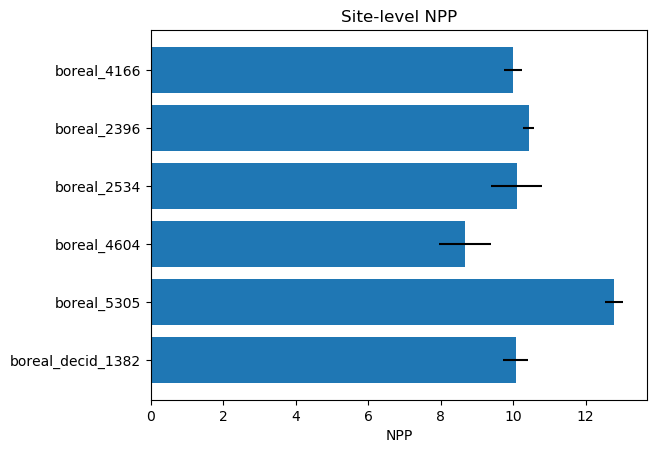

In [130]:
# reate horizontal bar chart to show NPP and Rh
# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('boreal_4166', 'boreal_2396', 'boreal_2534', 'boreal_4604', 'boreal_5305', 'boreal_decid_1382')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('NPP')
ax.set_title('Site-level NPP')

plt.show()


In [48]:
#========================================================
# Calculate R2
#========================================================

Xobs = obs_decid   # Obs CH4 flux
Xmod = mod_decid   # CH4 flux from ISAM

Xobs[np.isnan(Xmod)] = np.float('nan')
Xmod[np.isnan(Xobs)] = np.float('nan')
correlation = ma.corrcoef(ma.masked_invalid(Xobs), ma.masked_invalid(Xmod))[0,1]
r2 = correlation*correlation
print(r2)

0.27802330404299685


In [53]:
#========================================================
# Calculate ME for specific site
#========================================================
Xobs = obs_shrub   # Obs CH4 flux
Xmod = mod_shrub   # CH4 flux from ISAM
me = np.nanmean(Xobs-Xmod)
print(me)

-0.8202657632653063


/global/common/cori_cle7/software/python/2.7-anaconda-2019.07/lib/python2.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Tried to set a label via parameter u'y' in func 'errorbar' but couldn't find such an argument.
(This is a programming error, please report to the Matplotlib list!)


TypeError: errorbar() takes at least 3 arguments (1 given)

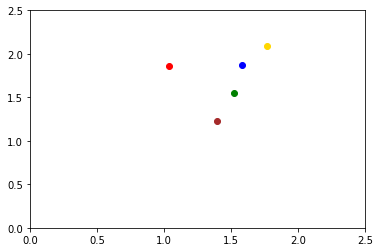

In [46]:
obs_b_mean = np.mean(obs_boreal)
obs_b_std = np.std(obs_boreal)
mod_b_mean = np.mean(mod_boreal)
mod_b_std = np.std(mod_boreal)

obs_d_mean = np.mean(obs_decid)
obs_d_std = np.std(obs_decid)
mod_d_mean = np.mean(mod_decid)
mod_d_std = np.std(mod_decid)

obs_t_mean = np.mean(obs_tundra)
obs_t_std = np.std(obs_tundra)
mod_t_mean = np.mean(mod_tundra)
mod_t_std = np.std(mod_tundra)

obs_g_mean = np.mean(obs_grass)
obs_g_std = np.std(obs_grass)
mod_g_mean = np.mean(mod_grass)
mod_g_std = np.std(mod_grass)

obs_s_mean = np.mean(obs_shrub)
obs_s_std = np.std(obs_shrub)
mod_s_mean = np.mean(mod_shrub)
mod_s_std = np.std(mod_shrub)

fig, ax = plt.subplots()
plt.xlim([0, 2.5])
plt.ylim([0, 2.5])
plt.scatter(obs_b_mean, mod_b_mean, color='green')
plt.scatter(obs_d_mean, mod_d_mean, color='gold')
plt.scatter(obs_t_mean, mod_t_mean, color='brown')
plt.scatter(obs_g_mean, mod_g_mean, color='blue')
plt.scatter(obs_s_mean, mod_s_mean, color='red')
ax.errorbar()
line = mlines.Line2D([0, 4.5], [0, 4.5], color='red')
ax.add_line(line)
plt.legend(['1:1 line', 'Boreal Evergreen', 'Boreal Deciduous', 'Tundra', 'Grassland', 'Shrubland'])
#plt.savefig('Calibration_rh_mean.jpg')

4.6512885622763411